<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

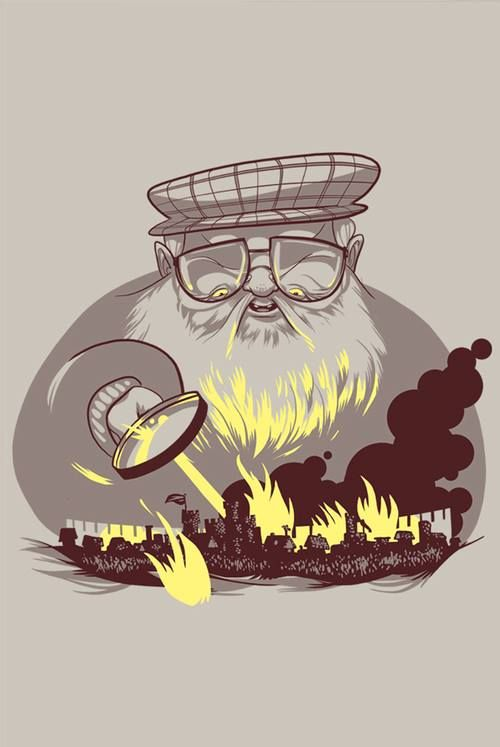

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Я выполнял всё локально, поэтому могут возникнуть конфликты при запуске в колабе.

### **Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [174]:
data_train = pd.read_csv("datasets/game_of_thrones_train.csv", index_col='S.No')
data_test = pd.read_csv("datasets/game_of_thrones_test.csv", index_col='S.No')
data_train.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


### **Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [175]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [176]:
data_train.isna().sum()

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

Пропусков очень много. На самом деле ситуация удручающая....

С пропусками типа object ничего не поделать, их придётся удалить при большом количестве NaN. Также удалим isAliveMother/Father/Heir/Spouse

In [177]:
data_train.drop(columns=["mother", "father", "heir", "spouse", "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse"], inplace=True)
data_test.drop(columns=["mother", "father", "heir", "spouse", "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse"], inplace=True)

Object столбцы мы удалили. Теперь посмотрим, какие уникальные значения есть в тех колонках, в которых тоже есть пропуски. Возможно, их получится ловко заменить

In [178]:
data_train.isna().sum()

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
house                381
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

In [179]:
data_train['culture'].dropna().unique()

array(['Rivermen', 'Dornish', 'Valyrian', 'Ironborn', 'Free Folk',
       'Northmen', 'Summer Isles', 'Braavosi', 'Dothraki', 'Ghiscari',
       'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazarene',
       'Free folk', 'Ironmen', 'Qartheen', 'Lysene', 'westermen',
       'Westerman', 'Qarth', 'Lyseni', 'northmen', 'Qohor', 'Westeros',
       'Norvoshi', 'First Men', 'Meereenese', 'Andal', 'Astapori',
       'Westermen', 'ironborn', 'Ghiscaricari', 'Braavos', 'Stormlands',
       'Valemen', 'Myrish', 'Lhazareen', 'Dornishmen', 'Sistermen',
       'Northern mountain clans', 'Andals', 'Vale', 'Crannogmen',
       'Wildling', 'Dorne', 'Pentoshi', 'free folk', 'Summer Islander',
       'Westerlands', 'Summer Islands'], dtype=object)

In [180]:
data_train['title'].dropna().unique()

array(['Lord of the Crossing', 'Ser', 'Queen', 'Greenstone',
       'Hand of the King', 'Archmaester', 'Maester', 'Khal', 'red hand',
       'Castellan', 'Seven Kingdoms', 'PrincessQueen',
       'Lord of the Iron Islands', 'Lord', 'Brother', 'Lord of Coldmoat',
       'Prince of Dragonstone', 'Lady', 'PrincessSepta', 'Princess',
       'Septa', 'Grand Maester', 'Septon', 'King', 'Seneschal',
       'Bloodrider', 'Stokeworth', 'Prince', 'LadyQueenDowager Queen',
       'Lord of the Tides', 'Lord of Dragonstone', 'Goodman', 'Wisdom',
       'King in the North', 'Winterfell', 'Steward', 'Eyrie',
       'Casterly Rock', 'Cupbearer', 'Hornwood',
       'Lord Steward of the Iron Islands', 'Blue Grace', 'Red Priest',
       'Khalakka', 'Good Master', 'QueenBlack Bride', 'Last Hearth',
       'Lord Paramount of the Mander', 'Seagard', 'Goodwife', 'Uplands',
       'BrotherProctor', 'Coldmoat', 'Ashford', 'Wind Witch', 'LadyQueen',
       'Broad Arch', 'Brightwater', 'Lady Marya', 'Blackcrown'

In [181]:
data_train['house'].dropna().unique()

array(['House Frey', 'House Swyft', 'House Arryn', 'House Santagar',
       'House Targaryen', 'House Osgrey', "Night's Watch", 'House Humble',
       'House Wylde', 'House Wode', 'House Fell',
       'Brotherhood Without Banners', 'House Webber', 'House Greyjoy',
       'House Stark', 'House Waynwood', 'House Dayne', 'House Manderly',
       'House Farwynd of the Lonely Light', 'Happy Port',
       'House of Loraq', 'Kingswood Brotherhood', 'House Botley',
       'Burned Men', 'House Velaryon', 'House Tallhart', 'House Tyrell',
       'House Blackwood', 'House Blackfyre', 'wildling',
       'Kingdom of the Three Daughters',
       'House Royce of the Gates of the Moon', 'House Nayland',
       "House Vance of Wayfarer's Rest", 'House Rowan', 'House Farrow',
       'House Lonmouth', 'House Reyne', 'House Ashford', 'House Brax',
       'House Paege', 'House Hollard', 'House Tarth', 'House Ryswell',
       'House Lannister', 'House Crakehall', 'House Darklyn',
       'House Westerling', 

На самом деле, тут довольно много схожих строк. Их нужно будет объединить в одни и посмотреть на распределение.

#### culture

Сначала разберёмся с culture. Для этого создадим словарь и объединим часто встречающиеся культуры. Те, которые встречаются редко, объединим равномерно в минорные культуры.

In [182]:
data_train['culture'].dropna().value_counts()

culture
Northmen                   94
Ironborn                   91
Free Folk                  45
Braavosi                   39
Valyrian                   28
Dothraki                   17
Ghiscari                   17
Dornish                    17
Reach                      13
Vale mountain clans        12
Valemen                    10
Rivermen                   10
northmen                    9
Westerman                   8
Free folk                   7
Tyroshi                     6
Qartheen                    5
Astapori                    4
Stormlands                  4
Summer Isles                4
Westeros                    3
Dornishmen                  3
Northern mountain clans     3
Ironmen                     3
Westermen                   3
Crannogmen                  2
Myrish                      2
Sistermen                   2
Meereenese                  2
First Men                   2
westermen                   2
Lysene                      2
Dorne                       1
Wi

Посмотрим на изначальное распределение культур

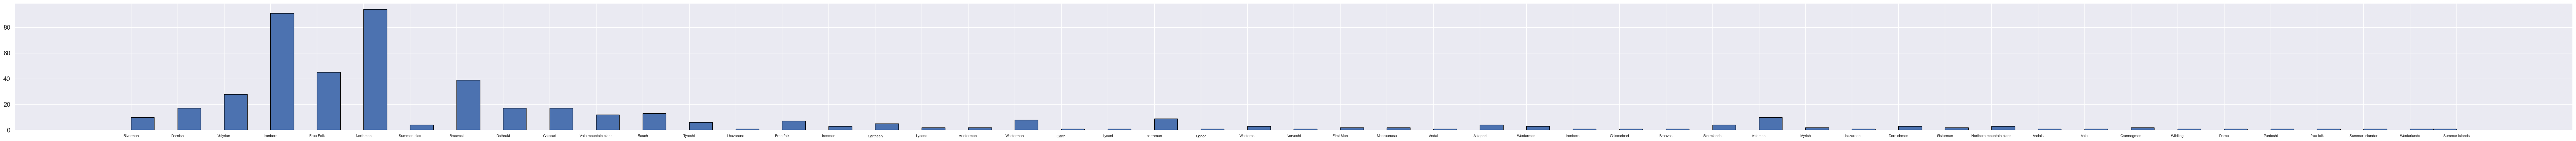

In [183]:
plt.figure(figsize=(100, 5))

plt.hist(data_train['culture'].dropna(), edgecolor='black', bins=100)

plt.xticks(fontsize=8)

plt.show()

In [184]:
cult = {
    'Northmen': ['the north', 'northmen', 'Northern mountain clans'],
    'Ironborn': ['ironborn', 'ironmen', 'Ironmen'],
    'Free Folk': ['free folk', 'Free folk'],
    'Valyrian': ['valyrian'],
    'Braavosi': ['braavosi', 'braavos'],
    'Ghiscari': ['ghiscari', 'ghiscaricari'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Dothraki': ['dothraki'],
    'Rivermen': ['rivermen'],
    'Valemen': ['valemen'],
    'Reach': ['the reach', 'reach', 'reachmen', 'The Reach', 'Reachmen'],
    'Valemountclans': ['vale mountain clans', 'Vale mountain clans'],
    'Westermen': ['Westeros', 'Western', 'Westerman', 'Westerlands', 'westermen'],
    'Stormmen': ['Stormlands', 'Stormlander'],
    'SummerIslemans': ['Summer Isles', 'Summer Islands', 'Summer Islander'],
    'Minor1': ['Tyroshi', 'Qartheen', 'Lysene', 'Crannogmen', 'Astapori'],
    'Minor2': ['Pentoshi', 'Meereenese', 'First Men', 'Lyseni'],
    'Minor3': ['Myrish', 'Wildling', 'Sistermen', 'Dorne', 'Lhazareen', 'Riverlands'],
    'Minor4': ['Wildlings', 'Asshai', 'Qohor', 'Astapor', 'Norvos', 'Meereen',
               "Asshai'i", 'Rhoynar'],
    'Minor5': ['Naathi', 'Ibbenese', 'Ghiscaricari', 'Vale',
               'Andals', 'Braavos', 'Andal', 'Norvoshi',
               'Qarth', 'Lhazarene']

}

# Создаем обратный словарь для замены
reverse_cult = {name: culture for culture, names in cult.items() for name in names}

# Заменяем значения в колонке culture
data_train['culture'] = data_train['culture'].replace(reverse_cult)
data_test['culture'] = data_test['culture'].replace(reverse_cult)

In [185]:
data_train['culture'].dropna().value_counts()

culture
Northmen          106
Ironborn           95
Free Folk          53
Braavosi           39
Valyrian           28
Minor1             19
Westermen          17
Dothraki           17
Ghiscari           17
Dornish            17
Reach              13
Valemountclans     12
Valemen            10
Rivermen           10
Minor5              8
Minor3              7
Minor2              6
SummerIslemans      6
Stormmen            4
Dornishmen          3
Minor4              1
Name: count, dtype: int64

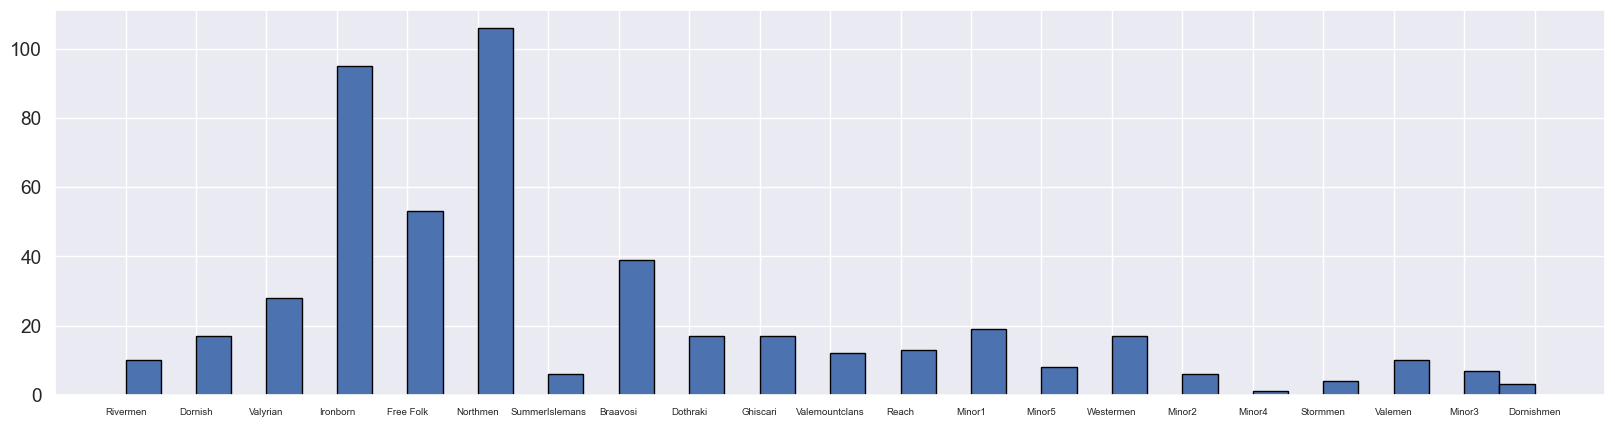

In [186]:
plt.figure(figsize=(20, 5))

plt.hist(data_train['culture'].dropna(), edgecolor='black', bins=40)

plt.xticks(fontsize=7)

plt.show()

Заменили успешно. Количество классов уменьшилось, распределение сохранилось

#### title

С оставшимися двумя признаками построить графики не получится ввиду большого количества классов

In [187]:
data_train['title'].dropna().value_counts()

title
Ser                   306
Maester                29
Archmaester            21
Lord                   19
Septon                 16
                     ... 
Sweetport Sound         1
Lord of Greyshield      1
Felwood                 1
Goldgrass               1
Highgarden              1
Name: count, Length: 195, dtype: int64

Для title и house я подготовил файлы со всеми возможными классами и их количеством в датасете. С помощью регулярного выражения я получаю количество данного класса и затем обрабатываю название класса 

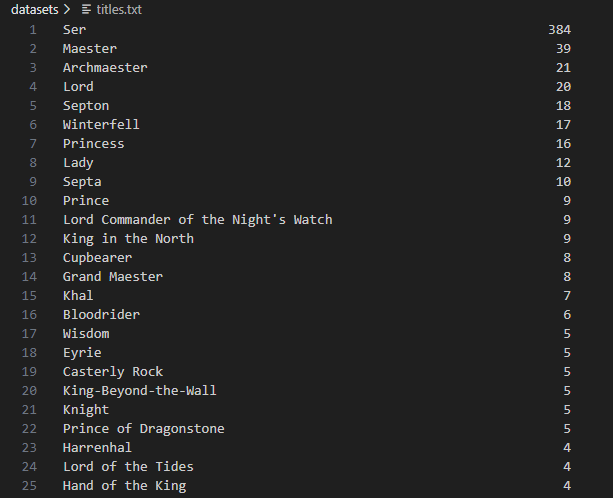

In [188]:
import re

In [189]:
def extract_numbers(input_string):
    numbers = re.findall(r'\d+', input_string)
    return [int(num) for num in numbers]


def create_title_dict(filename):
    title_dict = {}
    others = [] # полупокерские какие-то
    small_amount = [] # список для тех, кого мало

    with open(filename, 'r', encoding='utf-8') as file:
          for line in file:
            number = extract_numbers(line)[0]
            # Удаляем все цифры из строки
            clean_line = re.sub(r'\d+', '', line).strip()

            # Проверяем, что строка не пустая после удаления цифр
            if clean_line:
                # Разбиваем строку на части
                parts = clean_line.split()
                title = parts[0]


                # Если фамилия уже есть в словаре, добавляем полное имя в список
                if title in title_dict:
                    title_dict[title].append(clean_line)
                elif number > 6:
                    # Иначе создаем новый список с полным именем
                    title_dict[title] = [clean_line]
                elif len(parts) > 1 and number < 7:
                    # Иначе добавляем в список редковстречающихся
                    small_amount.append(clean_line)
                else:
                    # Иначе добавляем в список полупокеров
                    others.append(clean_line)

    if others:
        title_dict['invalid_entries'] = others
    if small_amount:
        title_dict['small_amount'] = small_amount

    return title_dict

In [190]:
filename = 'datasets/titles.txt'
title_dictionary = create_title_dict(filename)
# Создаем обратный словарь для замены
reverse_title = {new_title: title for title, names in title_dictionary.items() for new_title in names}

# Заменяем значения в колонке title
data_train['title'] = data_train['title'].replace(reverse_title)
data_test['title'] = data_test['title'].replace(reverse_title)

#### house

делаем всё то же самое для house

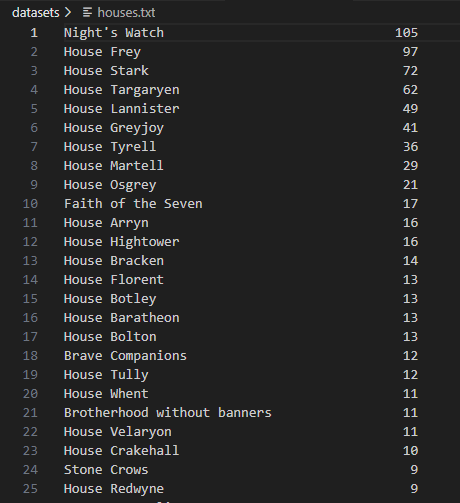

In [191]:
def extract_numbers(input_string):
    numbers = re.findall(r'\d+', input_string)
    return [int(num) for num in numbers]


def create_house_dict(filename):
    house_dict = {}
    small_amount = [] # список для тех, кого мало

    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:

          number = extract_numbers(line)[0]
          # Удаляем все цифры из строки
          clean_line = re.sub(r'\d+', '', line).strip()

          # Проверяем, что строка не пустая после удаления цифр
          if clean_line:
              # Разбиваем строку на части
              parts = clean_line.split()

              # Проверяем частоту этого дома
              if number > 5:
                  if len(parts) == 2:
                      house, house_name = parts
                      if house != 'House':
                          house_name = house
                      # Если дом уже есть в словаре, добавляем в список
                      if house_name in house_dict:
                          house_dict[house_name].append(clean_line)
                      else:
                          # Иначе создаем новый список
                          house_dict[house_name] = [clean_line]
              else:
                    small_amount.append(clean_line)
                    
    if small_amount:
        house_dict['small_amount'] = small_amount

    return house_dict

In [192]:
filename = 'datasets/houses.txt'
house_dictionary = create_house_dict(filename)
# Создаем обратный словарь для замены
reverse_house = {new_house: house for house, names in house_dictionary.items() for new_house in names}

# Заменяем значения в колонке name
data_train['house'] = data_train['house'].replace(reverse_house)
data_test['house'] = data_test['house'].replace(reverse_house)

Заменили успешно. Количество классов уменьшилось, распределение (может быть) сохранилось

Удалим все пропуски. Ничего особенного по их замене я не придумал, да и смысла наверное нет...Поэтому заменяю модой. Распределение, естественно, поплывёт

In [193]:
data_train['culture'].fillna(data_train['culture'].mode()[0], inplace=True)
data_train['house'].fillna(data_train['house'].mode()[0], inplace=True)
data_train['title'].fillna(data_train['title'].mode()[0], inplace=True)

C:\Users\mserg\AppData\Local\Temp\ipykernel_3244\1001005794.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['culture'].fillna(data_train['culture'].mode()[0], inplace=True)
C:\Users\mserg\AppData\Local\Temp\ipykernel_3244\1001005794.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [194]:
data_test['culture'].fillna(data_test['culture'].mode()[0], inplace=True)
data_test['house'].fillna(data_test['house'].mode()[0], inplace=True)
data_test['title'].fillna(data_test['title'].mode()[0], inplace=True)

C:\Users\mserg\AppData\Local\Temp\ipykernel_3244\3040566280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['culture'].fillna(data_test['culture'].mode()[0], inplace=True)
C:\Users\mserg\AppData\Local\Temp\ipykernel_3244\3040566280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

### **Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [195]:
import numpy as np

In [196]:
data_train['isPopular'] = np.where(data_train['popularity'] > 0.5, 1, 0)

data_train['boolDeadRelations'] = np.where(data_train['numDeadRelations'] > 0, 1, 0)

data_train.drop(columns=['popularity', 'numDeadRelations'], inplace=True)

data_test['isPopular'] = np.where(data_test['popularity'] > 0.5, 1, 0)

data_test['boolDeadRelations'] = np.where(data_test['numDeadRelations'] > 0, 1, 0)

data_test.drop(columns=['popularity', 'numDeadRelations'], inplace=True)

### **Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [197]:
data_train.isna().sum()

name                    0
title                   0
male                    0
culture                 0
dateOfBirth          1278
house                   0
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isMarried               0
isNoble                 0
age                  1278
isAlive                 0
isPopular               0
boolDeadRelations       0
dtype: int64

In [198]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              1557 non-null   object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   dateOfBirth        279 non-null    float64
 5   house              1557 non-null   object 
 6   book1              1557 non-null   int64  
 7   book2              1557 non-null   int64  
 8   book3              1557 non-null   int64  
 9   book4              1557 non-null   int64  
 10  book5              1557 non-null   int64  
 11  isMarried          1557 non-null   int64  
 12  isNoble            1557 non-null   int64  
 13  age                279 non-null    float64
 14  isAlive            1557 non-null   int64  
 15  isPopular          1557 non-null   int32  
 16  boolDeadRelations  1557 non-n

Ну вообще говоря без матрицы корреляции тяжело сказать, какие признаки нужны, а какие нет. Странная последовательность заданий в ноутбуке...

In [199]:
num_columns = ['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'isAlive', 'isPopular', 'boolDeadRelations']

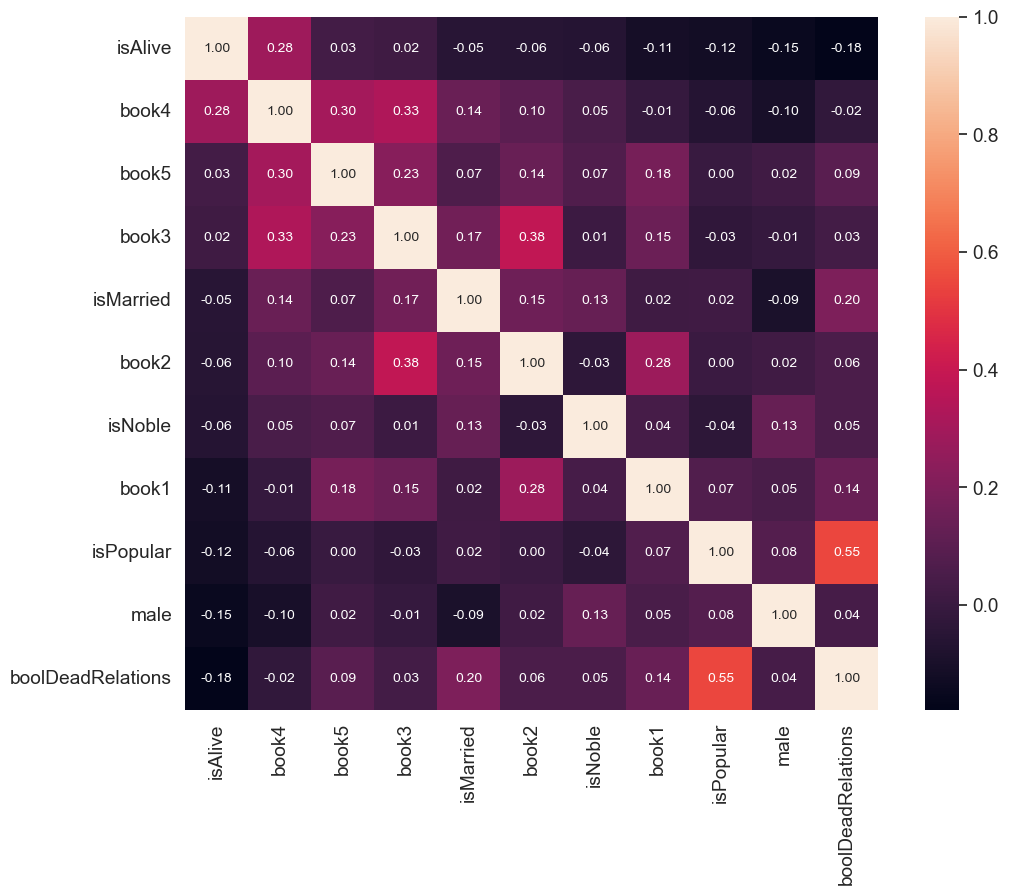

In [200]:
corrmat = data_train[num_columns].corr()
f, ax = plt.subplots(figsize=(12, 9))

k = 13
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data_train[num_columns][cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Видим коррелирующие между собой признаки:
1. isPopular с boolDeadRelations
2. book4 с book3 и book5

так как is Popular меньше коррелирует с целевой переменной, дропнем её...
p.s да, можно устроить танцы с PCA, но мне честно говоря лень...

In [201]:
data_train.drop(columns=['isPopular'], inplace = True)
data_test.drop(columns=['isPopular'], inplace = True)

С книгами уже интереснее. Попробуем включить логику и подумать, при появлении в каких книгах вероятнее всего герой жив. Сделаем новый признак на основании своих размышлений

In [202]:
# Условие для maybeAlive
data_train['maybeAlive'] = 0  # Изначально заполняем колонку нулями

# Условие для присвоения значения 1
data_train.loc[(data_train['book1'] == 0) & (data_train['book2'] == 0) & ((data_train['book3'] == 1) |
        (data_train['book4'] == 1) | (data_train['book5'] == 1)) |
         ((data_train['book1'] == 1) & (data_train['book2'] == 1) & (data_train['book3'] == 1)) &
          (data_train['book4'] == 1) & (data_train['book5']==1), 'maybeAlive'] = 1
# Условие для присвоения значения 0
data_train.loc[((data_train['book1'] == 1) | (data_train['book2'] == 1) | (data_train['book3'] == 1)) &
          ((data_train['book4'] == 0)), 'maybeAlive'] = 0


# Условие для maybeAlive
data_test['maybeAlive'] = 0  # Изначально заполняем колонку нулями

# Условие для присвоения значения 1
data_test.loc[(data_test['book1'] == 0) & (data_test['book2'] == 0) &
              ((data_test['book3'] == 1) | (data_test['book4'] == 1) |
               (data_test['book5'] == 1)) |
              ((data_test['book1'] == 1) & (data_test['book2'] == 1) &
               (data_test['book3'] == 1)) & (data_test['book4'] == 1) &
                (data_test['book5']==1), 'maybeAlive'] = 1
# Условие для присвоения значения 0
data_test.loc[((data_test['book1'] == 1) | (data_test['book2'] == 1) |
              (data_test['book3'] == 1)) & ((data_test['book4'] == 0)),
              'maybeAlive'] = 0

Теперь можно дропнуть все эти книжные признаки

In [203]:
data_train.drop(columns=['book1', 'book2', 'book3', 'book4', 'book5'], inplace = True)
data_test.drop(columns=['book1', 'book2', 'book3', 'book4', 'book5'], inplace = True)

Построим ещё раз матрицу корреляции

In [204]:
num_columns = ['male', 'maybeAlive', 'isMarried', 'isNoble', 'isAlive', 'boolDeadRelations']

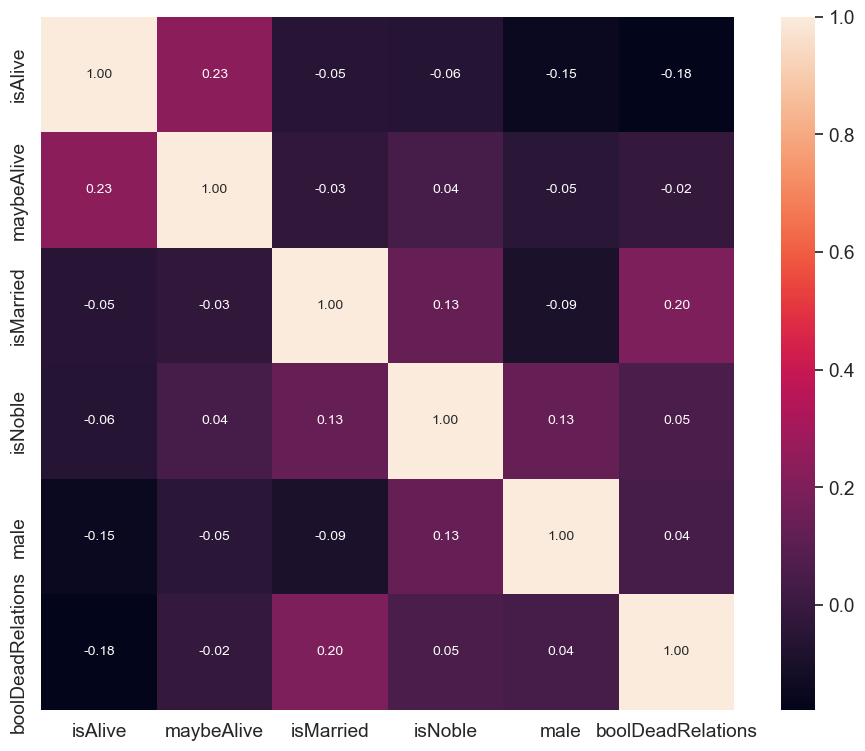

In [205]:
corrmat = data_train[num_columns].corr()
f, ax = plt.subplots(figsize=(12, 9))

k = 6
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data_train[num_columns][cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Думаю, пока хватит

### **Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [206]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              1557 non-null   object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   dateOfBirth        279 non-null    float64
 5   house              1557 non-null   object 
 6   isMarried          1557 non-null   int64  
 7   isNoble            1557 non-null   int64  
 8   age                279 non-null    float64
 9   isAlive            1557 non-null   int64  
 10  boolDeadRelations  1557 non-null   int32  
 11  maybeAlive         1557 non-null   int64  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 152.1+ KB


Целевая переменная - isAlive - количественная

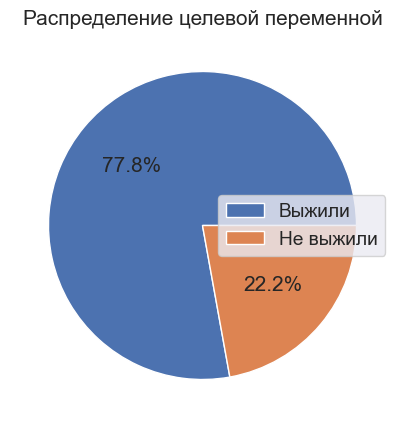

In [207]:
plt.figure(figsize=(7, 5))
plt.pie(data_train['isAlive'].value_counts(), autopct='%1.1f%%')
plt.legend(['Выжили', 'Не выжили'])
plt.title('Распределение целевой переменной')
plt.show()

Датасет несбалансирован. Увы, ничего с этим делать не буду...

### **Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

#### Категориальные признаки

In [208]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              1557 non-null   object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   dateOfBirth        279 non-null    float64
 5   house              1557 non-null   object 
 6   isMarried          1557 non-null   int64  
 7   isNoble            1557 non-null   int64  
 8   age                279 non-null    float64
 9   isAlive            1557 non-null   int64  
 10  boolDeadRelations  1557 non-null   int32  
 11  maybeAlive         1557 non-null   int64  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 152.1+ KB


У нас 4 категориальных признака. С именем увы ничего не поделать - его дропнем.

In [209]:
data_train.drop(columns='name', inplace=True)
data_test.drop(columns='name', inplace=True)

Теперь подумаем, как закодировать оставшиеся. В каждом признаке много классов, так что one-hot сразу отпадает. Label encoding тоже сомнительная затея. Остаются:
1. Target Encoding - заменяет категории числовыми значениями, основанными на целевой переменной. Для каждой категории вычисляется среднее значение целевой переменной, и это значение используется как новый числовой признак.
2. Frequency Encoding - преобразует категории в числовые значения, основанные на частоте их появления в данных. Каждой категории присваивается числовое значение, которое соответствует частоте ее встречаемости в данных.

Из этих двух мне больше нравится первый вариант. Так мы получим хорошую корреляцию с целевой переменной.

In [110]:
from sklearn.preprocessing import TargetEncoder

In [210]:
categorical_features = ['culture', 'house', 'title']

In [236]:
targetencoder = TargetEncoder() # используем все параметры по умолчанию

#data_train_X = data_train.drop(columns='isAlive')
data_train_X = data_train[categorical_features]
data_train_y = data_train['isAlive']

data_train_X_transformed = targetencoder.fit_transform(data_train_X, data_train_y)

data_test_transformed = targetencoder.transform(data_test[categorical_features])


In [237]:
data_train_X_transformed

array([[0.78570689, 0.8105628 , 0.79045289],
       [0.75338603, 0.87967509, 0.71003652],
       [0.77956874, 1.        , 0.79435603],
       ...,
       [0.77825166, 0.75604869, 0.79147098],
       [0.69978643, 0.8105628 , 0.79045289],
       [0.78570689, 0.8105628 , 0.79045289]])

In [238]:
data_train_X_transformed_df = pd.DataFrame(data_train_X_transformed, 
                                           columns=targetencoder.get_feature_names_out(categorical_features),
                                           index=data_train.index)
data_train_X_transformed_df

,culture,house,title
S.No,,,
1,0.785707,0.810563,0.790453
2,0.753386,0.879675,0.710037
3,0.779569,1.000000,0.794356
4,0.785707,0.753409,0.759806
5,1.000000,0.808241,0.737329
...,...,...,...
1553,0.779552,0.825834,1.000000
1554,0.785707,0.810563,0.790453
1555,0.778252,0.756049,0.791471


In [239]:
data_test_transformed_df = pd.DataFrame(data_test_transformed, 
                                           columns=targetencoder.get_feature_names_out(categorical_features),
                                           index=data_test.index)
data_test_transformed_df

,culture,house,title
S.No,,,
1558,0.780424,0.811559,0.793181
1559,1.000000,0.811559,0.793181
1560,0.780424,0.756073,0.793181
1561,0.780424,0.811559,0.793181
1562,0.606334,0.898167,0.793181
...,...,...,...
1942,0.548912,0.768049,0.793181
1943,0.780424,0.826836,0.793181
1944,0.780424,0.811559,0.793181


In [242]:
data_train.drop(columns=categorical_features, inplace=True)

In [243]:
data_test.drop(columns=categorical_features, inplace=True)

In [244]:
data_train = pd.concat([data_train, data_train_X_transformed_df], axis=1)
data_train

,male,dateOfBirth,isMarried,isNoble,age,isAlive,boolDeadRelations,maybeAlive,culture,house,title
S.No,,,,,,,,,,,
1,1,NaN,0,0,NaN,0,1,0,0.785707,0.810563,0.790453
2,1,208.0,1,1,97.0,1,1,1,0.753386,0.879675,0.710037
3,1,NaN,0,1,NaN,1,0,1,0.779569,1.000000,0.794356
4,0,82.0,1,1,23.0,0,0,0,0.785707,0.753409,0.759806
5,0,276.0,1,1,29.0,1,0,1,1.000000,0.808241,0.737329
...,...,...,...,...,...,...,...,...,...,...,...
1553,1,NaN,0,1,NaN,1,0,0,0.779552,0.825834,1.000000
1554,0,NaN,0,0,NaN,0,0,0,0.785707,0.810563,0.790453
1555,1,NaN,0,0,NaN,0,0,0,0.778252,0.756049,0.791471


In [245]:
data_test = pd.concat([data_test, data_test_transformed_df], axis=1)
data_test

,male,dateOfBirth,isMarried,isNoble,age,boolDeadRelations,maybeAlive,culture,house,title
S.No,,,,,,,,,,
1558,0,156.0,0,0,100.0,0,1,0.780424,0.811559,0.793181
1559,0,NaN,0,0,NaN,0,0,1.000000,0.811559,0.793181
1560,0,NaN,0,0,NaN,0,1,0.780424,0.756073,0.793181
1561,1,NaN,0,1,NaN,0,1,0.780424,0.811559,0.793181
1562,1,262.0,1,0,38.0,0,1,0.606334,0.898167,0.793181
...,...,...,...,...,...,...,...,...,...,...
1942,1,NaN,0,0,NaN,0,1,0.548912,0.768049,0.793181
1943,1,NaN,0,0,NaN,0,0,0.780424,0.826836,0.793181
1944,1,NaN,0,0,NaN,0,1,0.780424,0.811559,0.793181


#### Количественные признаки

Замечательно. Теперь ещё раз посмотрим на матрицу корреляции

In [246]:
num_columns = ['male', 'maybeAlive', 'isMarried', 'isNoble', 'isAlive', 'boolDeadRelations', 'culture', 'house', 'title']

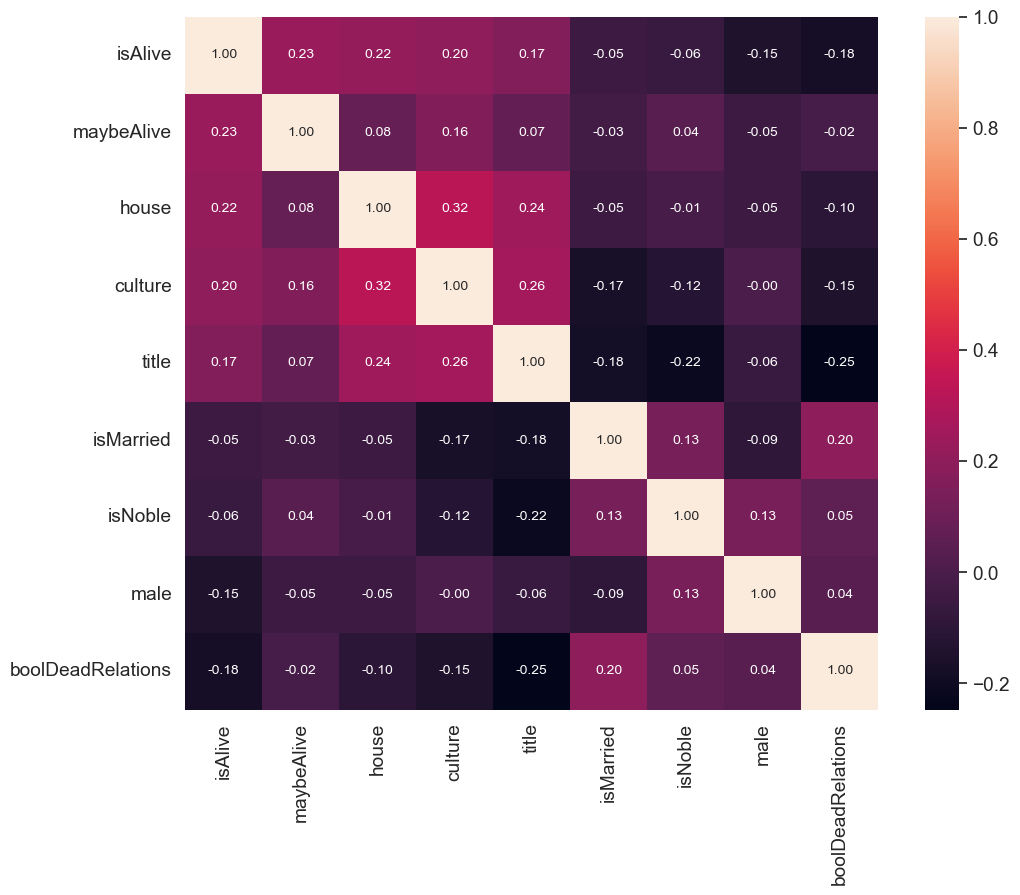

In [247]:
corrmat = data_train[num_columns].corr()
f, ax = plt.subplots(figsize=(12, 9))

k = 9
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data_train[num_columns][cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

В целом корреляция между title, house и culture вполне ожидаема ввиду способа их кодирования. Попробую два раза обучить модель с удалением коррелирующих между собой признаков и без удаления

Теперь самое интересное. У нас есть признаки dateOfBirth и Age. Если бы я не делал этот блокнот полгода назад, я бы, честно говоря, никогда не задумался о том, что эти признаки вообще говоря имеют прямое соответствие с целевой переменной

Посмотрим на распределения этих признаков

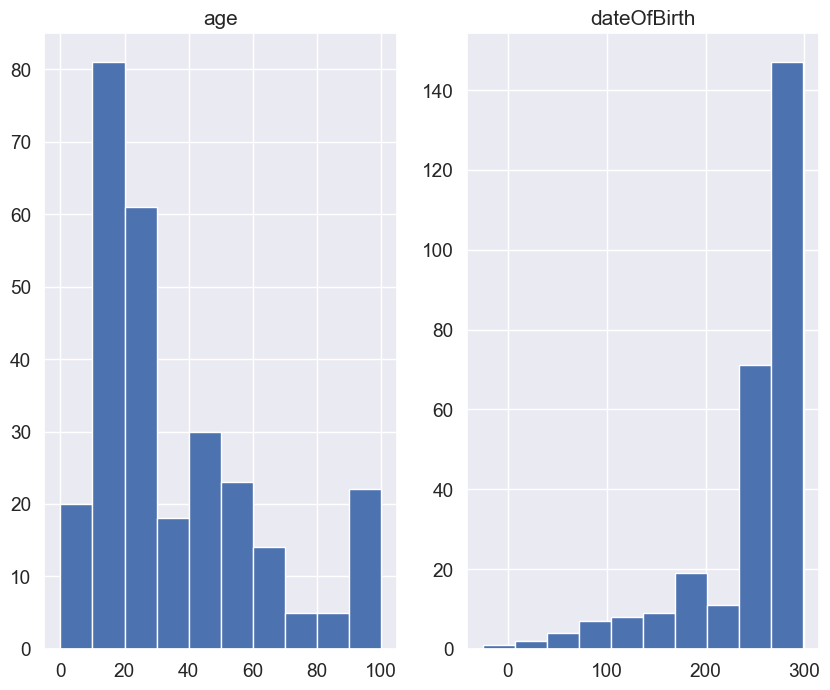

In [270]:
data_age = data_train['age']
data_dateOfBirth = data_train['dateOfBirth'] 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.hist(data_age)
ax2.hist(data_dateOfBirth)

ax1.set_title('age')
ax2.set_title('dateOfBirth')

plt.show()

Теперь посмотрим на зависимость каждого этого признака и целевой переменной

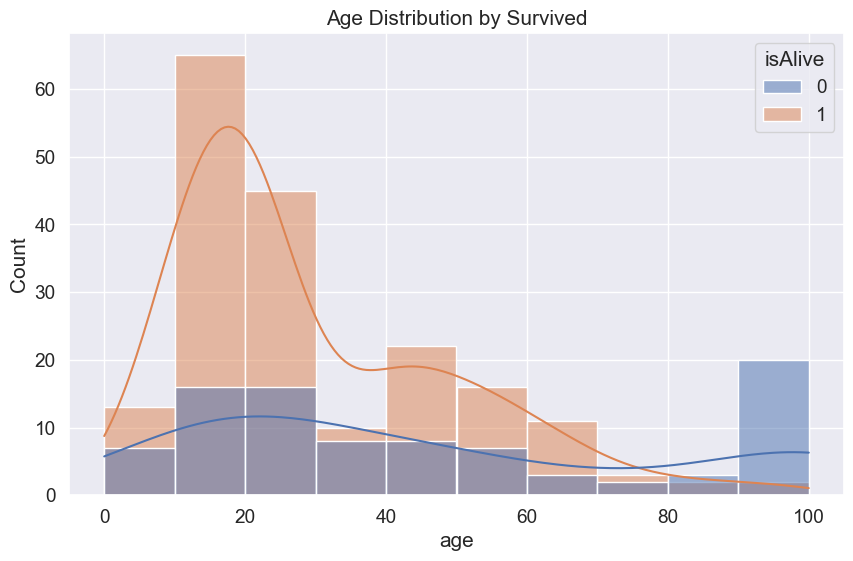

In [304]:
plt.figure(figsize=(10, 6))
sns.histplot(data_train, x='age', kde=True, hue='isAlive')
plt.title('Age Distribution by Survived')
#plt.xlim(180, 310)
plt.show()

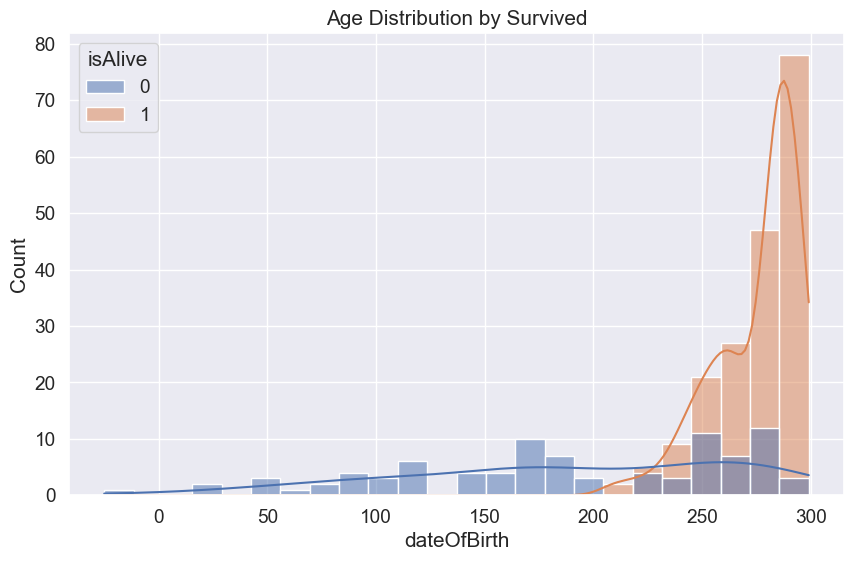

In [275]:
plt.figure(figsize=(10, 6))
sns.histplot(data_train, x='dateOfBirth', kde=True, hue='isAlive')
plt.title('Age Distribution by Survived')
#plt.xlim(180, 310)
plt.show()

Ну и ChatGPT подтверждает наши предположения. Если возраст больше определённого, то скорее всего герой мёртв

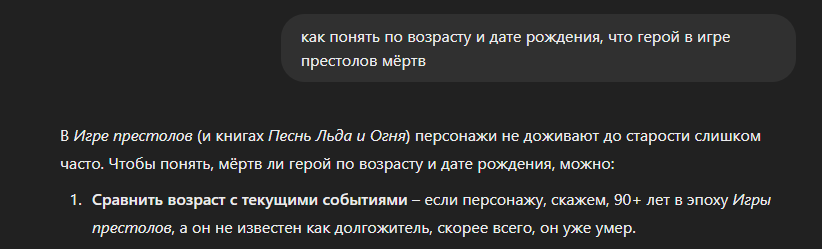

Оставим только признак age, так как они друг друга дублируют

In [276]:
data_train.drop(columns='dateOfBirth', inplace=True)
data_test.drop(columns='dateOfBirth', inplace=True)

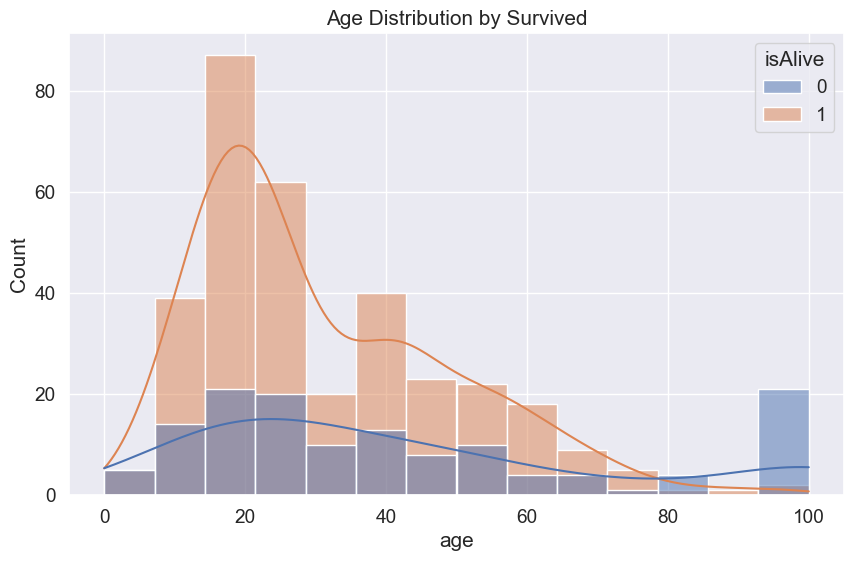

In [303]:
import copy

data = copy.deepcopy(data_train)

data['age'] = data_train['age'].fillna(data_train['age'].rolling(window=5, min_periods=2, center=True).mean())

plt.figure(figsize=(10, 6))
sns.histplot(data, x='age', kde=True, hue='isAlive')
plt.title('Age Distribution by Survived')
#plt.xlim(180, 310)
plt.show()

Но у нас всё ещё куча NaNов в этом признаке. Как мы видели выше, заполнять модой или медианой не совсем корректно, всё-таки пропусков довольно много. Поэтому заполним по совету моего товарища скользящим средним

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = # ...
y = # ...

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = # ...

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from ... import AdaBoostClassifier, RandomForestClassifier
from ... import GaussianProcessClassifier
from ... import GaussianNB
from ... import KNeighborsClassifier
from ... import SVC
from ... import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)